<p style="font-size:38px"><span style="font-family:Times New Roman"><b><span style="color:blue"> Problem Statement</span></b></span></p>

***


<p style="font-size:20px"><span style="font-family:Times New Roman"> This dataset describe Portugal bank marketing campaigns results. </span>.</p>

<p style="font-size:20px"><span style="font-family:Times New Roman">The Conducted campaign were based mostly on direct phone calls, Persuading Potential customers to become new customers of the bank.</span>.</p>

    
<p style="font-size:20px"><span style="font-family:Times New Roman">The classification goal is to predict if the new customer will join the bank, then if the Potential customer agrees to become a customer of the bank, then the target variable is marked 'yes', otherwise 'no'</span>.</p>

 Source:[UCI IT](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

# <span style="font-family:Times New Roman">About The Project</span>

<p style="font-size:20px"><span style="font-family:Times New Roman"> In this project, I will analyze the Bank lead's dataset and create a classification algorithm with full end feature engineering and Exploratory Data Analysis (EDA). </span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman"><br> The first part we will deal with the description and visualization of the data analysed, and in the second we will go to the data classification models.  </span></p>

# <span style="font-family:Times New Roman"> Objectives of this project:</span>


<p style="font-size:20px"><span style="font-family:Times New Roman">*​  Predicting the future results of marketing companies based on available statistics and, accordingly, formulating recommendations for such companies in the future. </span></p>


<p style="font-size:20px"><span style="font-family:Times New Roman">*​ Building a profile of a customer of banking services (New Customers) </span></p>


<p style="font-size:20px"><span style="font-family:Times New Roman">*​ Make recommendations for future campaigns </span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman">*​ Performance Optimization: Using regularization, hyperparameter tuning, model. </span></p>


# <span style="font-family:Times New Roman"> Let's Prepare Our Data for Consumption</span>

## <span style="font-family:Times New Roman"> Import Libraries</span>




<p style="font-size:20px"><span style="font-family:Times New Roman"> Let's import all necessary libraries for the analysis and along with it let's bring down our dataset</span>.</p>

In [1]:
## Database Phase
import pandas as pd
import numpy as np


# Machine Learning Phase
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Metrics Phase
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

<p style="font-size:20px"><span style="font-family:Times New Roman"> Introduction To Our Data </span>.</p>

<p style="font-size:20px"><span style="font-family:Times New Roman"> We will be creating and getting our data info and we will welcome it.</span>.</p>

In [2]:
bank=pd.read_csv('bank-full.csv',sep=';')
bank_copy=bank.copy()

## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(bank_copy.shape))
print (bank_copy.info())

The shape of the  data is (row, column):(45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


# <span style="font-family:Times New Roman">Data anaysis</span>

<p style="font-size:20px"><span style="font-family:Times New Roman">We have 45211 instances and 17 features.  anyway we will strictly scrutinize each feature and check for suspicious records and manipulate them.</span>.</p>

#  <span style="font-family:Times New Roman">Attributes of New Customers</span>

<p style="font-size:20px"><span style="font-family:Times New Roman">* Age : Age of the lead (numer)</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Job : type of job (Categorical) </span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Marital : Marital status (Categorical) </span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Education : Educational Qualification of the lead (Categorical) </span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Default: Does the lead has any default(unpaid)credit (Categorical) </span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Housing: Does the lead has any housing loan? (Categorical) </span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Loan: Does the lead has any personal loan? (Categorical) </span></p>
    
# <span style="font-family:Times New Roman">Related with the last contact of the current campaign: </span>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Contact: Contact communication type (Categorical)</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Month: last contact month of year (Categorical) </span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Day_of_week: last contact day of the week (categorical) </span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Duration: last contact duration, in seconds (numeric). </span></p>


# <span style="font-family:Times New Roman">Important note: </span>
<p style="font-size:20px"><span style="font-family:Times New Roman"> Duration highly affects the output target (e.g., if duration=0 then Y=NO).<br> Yet, the duration is not known before a call is performed. Also, after the end of the call Y is obviously known.</span>.</p>

# <span style="font-family:Times New Roman">Output variable (Desired target)</span>
<p style="font-size:20px"><span style="font-family:Times New Roman"><span style="color:blue">Y </span>= <span style="color:orange">Will the person become a new customer?</span> (Binary: <span style="color:green">Yes</span><span style="color:black">/<span><span style="color:Red">No<span>) </span></p>

  

***

# <span style="font-family:Times New Roman">Imported Data</span>

In [3]:
df = pd.read_csv('bank-full.csv',sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


***

# <span style="font-family:Times New Roman"> Checking out the categories and their respective counts in each feature</span>

In [4]:
print("Job:",bank_copy.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",bank_copy.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",bank_copy.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",bank_copy.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",bank_copy.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",bank_copy.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",bank_copy.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",bank_copy.month.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",bank_copy.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",bank_copy.y.value_counts(),sep = '\n')
print("-"*40)

Job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
----------------------------------------
Marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
----------------------------------------
Education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
----------------------------------------
Default:
no     44396
yes      815
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes    25130
no     20081
Name: housing, dtype: int64
----------------------------------------
Personal loan:
no     37967
yes     7244
Name: loan, dtype: int64
----------------------------------------
Contact:
cellular     29285
unknown      13020
telephone

# <span style="font-family:Times New Roman">Data Cleaning</span>
## <span style="font-family:Times New Roman">Checking for missing values</span>

<p style="font-size:20px"><span style="font-family:Times New Roman">First let's check it visually.</span>.</p>

In [5]:
print('bank-full.csv',bank_copy.isnull().sum(), sep = '\n')

bank-full.csv
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


***

# <span style="font-family:Times New Roman">Categorical columns exploration</span>

<p style="font-size:20px"><span style="font-family:Times New Roman">In the dataset we have both categorical and numerical columns. Let's look at the values of categorical columns first.</span>.</p>

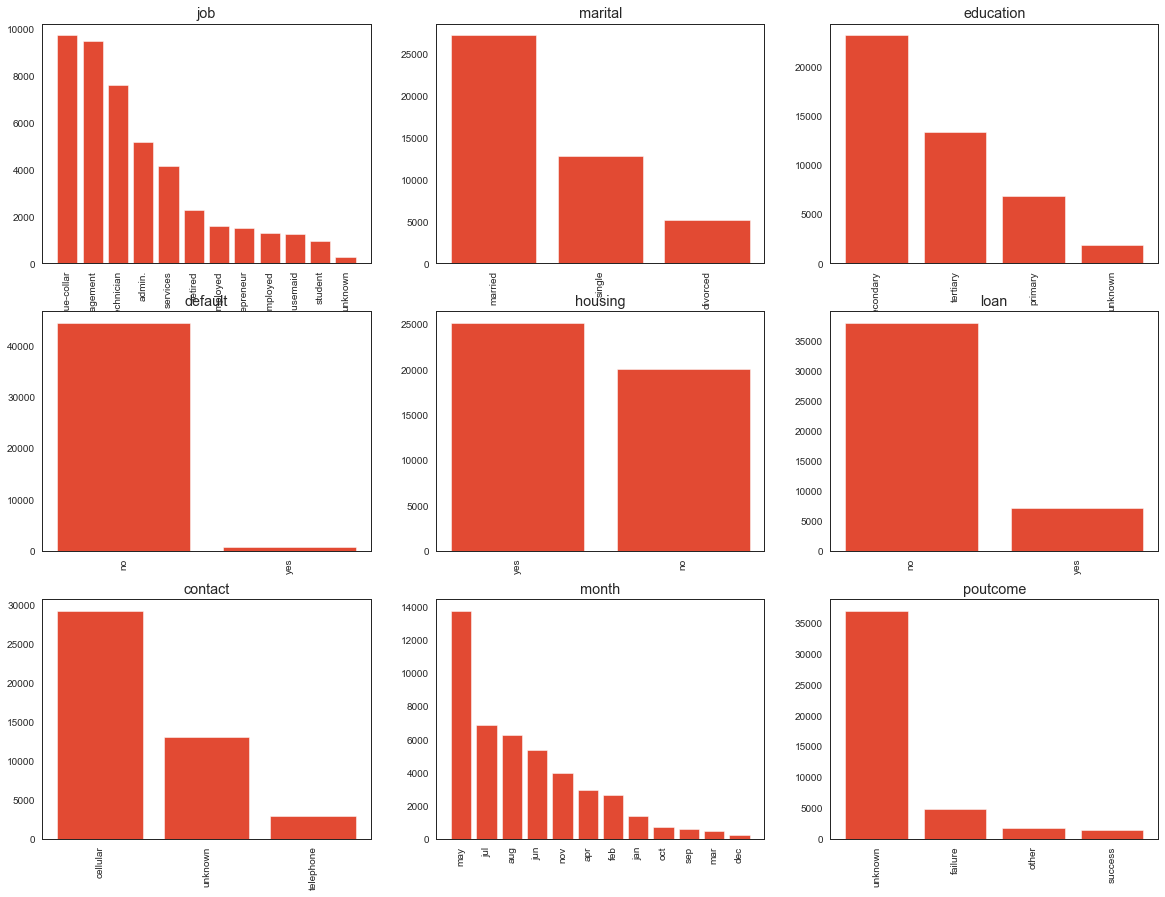

In [6]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

***

#  <span style="font-family:Times New Roman">Conclusion:</span>

## <span style="font-family:Times New Roman"> From the above visuals, we can make the following observations:</span>

<p style="font-size:20px"><span style="font-family:Times New Roman">* The top four professions that our customers belong to are - Administration, Blue-collar jobs, Technicians and Management.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* A huge number of the customers are married.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Majority of the customers do not have a credit in default</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Many of our past customers have applied for a housing loan but very few have applied for personal loans.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Cell-phones seem to be the most favoured method of reaching out to customers.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Many customers have been contacted in the month of May.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* The plot for the target variable shows heavy imbalance in the target variable.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* The missing values in some columns have been represented as unknown. unknown represents missing data.</span></p>

***

# <span style="font-family:Times New Roman">Numerical columns exploration</span>

<p style="font-size:20px"><span style="font-family:Times New Roman">Now let's look at the numerical columns' values. The most convenient way to look at the numerical values is plotting histograms.</span>.</p>

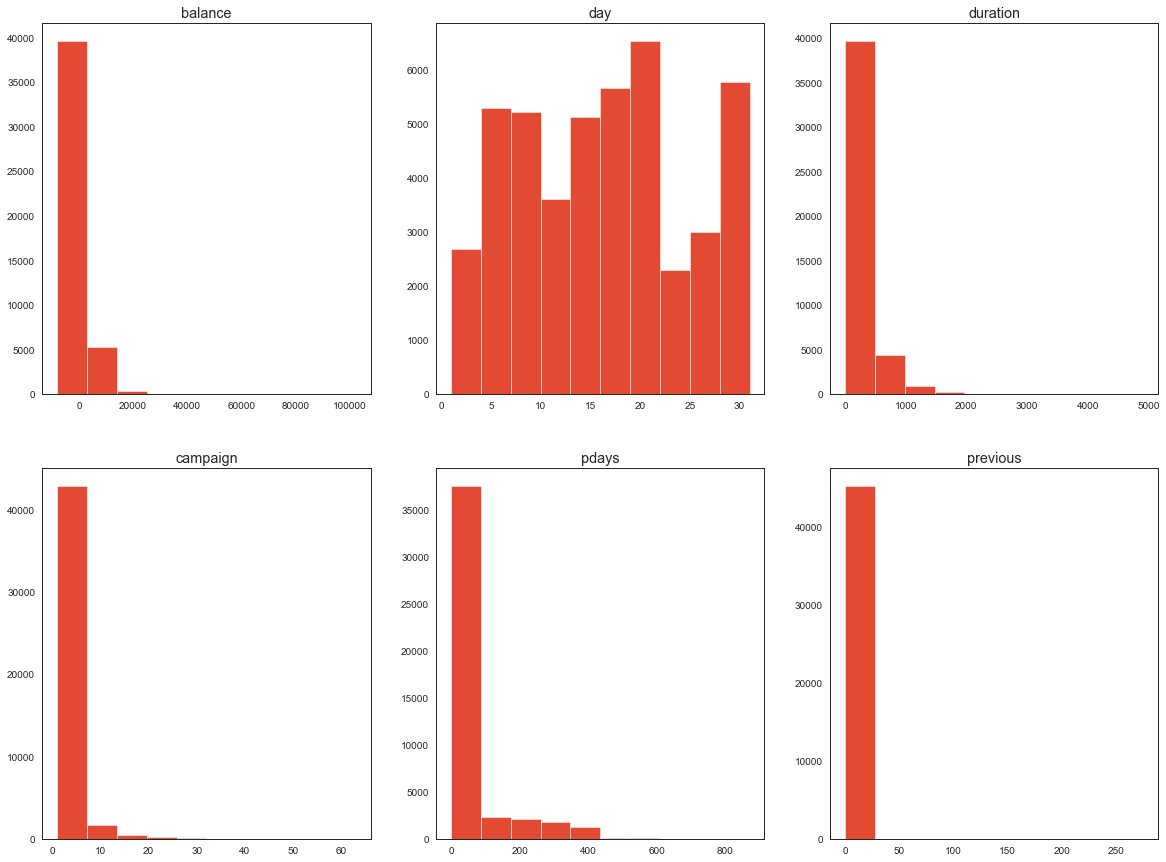

In [7]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

# <span style="font-family:Times New Roman">Conclusion </span>
<p style="font-size:20px"><span style="font-family:Times New Roman">We can see that numerical columns have outliers (especially 'pdays', 'campaign' and 'previous' columns). Possibly there are incorrect values (noisy data), so we should look closer at the data and decide how do we manage the noise.
Let's look closer at the values of 'campaign', 'pdays' and 'previous' columns:</span>.</p>

In [8]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,45211.000000,45211.000000,45211.000000
mean,40.197828,2.763841,0.580323
std,100.128746,3.098021,2.303441
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,63.000000,275.000000


<p style="font-size:20px"><span style="font-family:Times New Roman">Percentage of <span style="color:blue">'pdays'</span> values above 400</spap></p>

In [9]:
len (df[df['pdays'] > 400] ) / len(df) * 100

0.5175731569750724

# <span style="font-family:Times New Roman"> Conclusion</span>

<p style="font-size:20px"><span style="font-family:Times New Roman"><span style="color:blue">Pdays</span> holds the number of days that passed by after the customer was last contacted from a previous campaign Looking closer into <span style="color:blue">pdays</span> data we can see that:</span>

<p style="font-size:20px"><span style="font-family:Times New Roman"> Only 1.2% of values is above 400. They are possibly outliers, so we should consider imputing something (possibly mean value) instead of these values.</span>

<p style="font-size:20px"><span style="font-family:Times New Roman">-1 possibly means that the customer wasn't contacted before or stands for missing data.</span>

<p style="font-size:20px"><span style="font-family:Times New Roman">Since we are not exactly sure what -1 means I suggest we drop this column, because -1 makes more than 50% of the values of the column.</span>

***

<p style="font-size:20px"><span style="font-family:Times New Roman"> Percentage of <span style="color:blue"> campaign</span> values above 20 </span></p>

In [10]:
len (df[df['campaign'] > 34] ) / len(df) * 100

0.059719979650969895

# <span style="font-family:Times New Roman">Conclusion</span>
</span><p style="font-size:20px"><span style="font-family:Times New Roman"><span style="color:blue"><b>Campaign</b></span> holds the number of contacts performed during this <span style="color:blue">campaign </span> and for this customer (numeric, includes last contact) Numbers for 'campaign' above 34 are clearly noise, so I suggest to impute them with average campaign values while data cleaning.</span></p>

***

<p style="font-size:20px"><span style="font-family:Times New Roman"> Percentage of <span style="color:blue">Previous</span> values above 20 </span></p>

In [11]:
len (df[df['previous'] > 34] ) / len(df) * 100

0.024330362080024773

# <span style="font-family:Times New Roman">Conclusion</span>
<p style="font-size:20px"><span style="font-family:Times New Roman"><span style="color:blue"><b>Previous</b></span> holds the number of contacts performed before this <span style="color:blue"><b> campaign</b></span> and for this customer (numeric) Numbers for <span style="color:blue"> previous campaign</span> above 34 are also really strange, My suggestion will be to impute them with average campaign values while data cleaning.<span></p>

***

# <span style="font-family:Times New Roman">Analysis of the response column</span>
<p style="font-size:20px"><span style="font-family:Times New Roman">It is very important to look at the response column, which holds the information, which we are going to predict. In our case we should look at 'New Customer y' column and compare it's values to other columns.
First of all we should look at the number of 'yes' and 'no' values in the response column 'New Customer y'.</span>.</p>

***

<AxesSubplot:title={'center':'New Customer value counts'}>

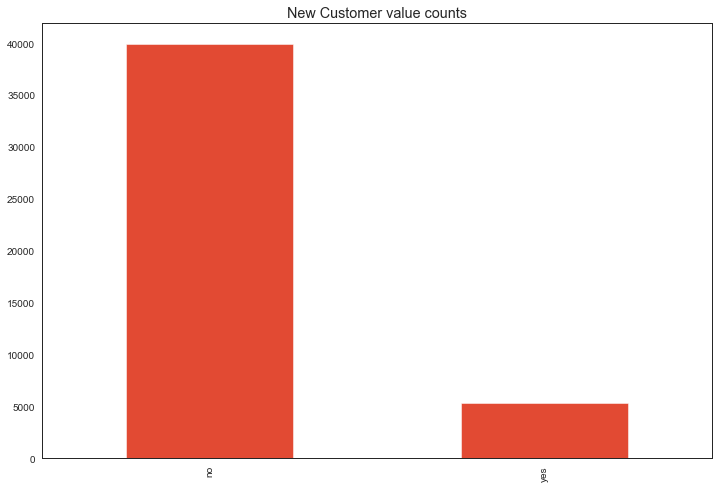

In [12]:
value_counts = df['y'].value_counts()

value_counts.plot.bar(title = 'New Customer value counts')

<p style="font-size:20px"><span style="font-family:Times New Roman"> On the diagram we can see that counts for 'yes' and 'no' values for 'New Customer' is not close, so we can use accuracy as a metric for a model, which predicts the campaign outcome.</span>.</p>

***

<p style="font-size:20px"><span style="font-family:Times New Roman"> Let's see how <span style="color:blue"><b>New Customer y</b></span> column value varies depending on other categorical columns' values:</span>.</p>

<AxesSubplot:title={'center':'Job and New Customer y'}>

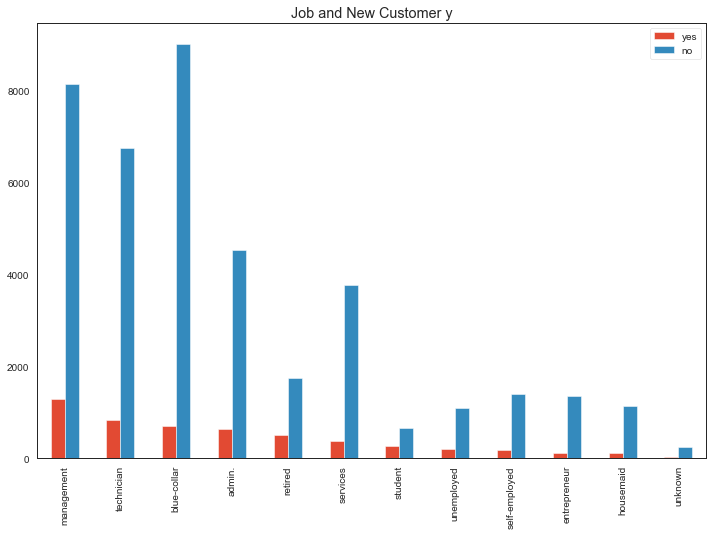

In [13]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and New Customer y')

<AxesSubplot:title={'center':'Marital status and New Customer y'}>

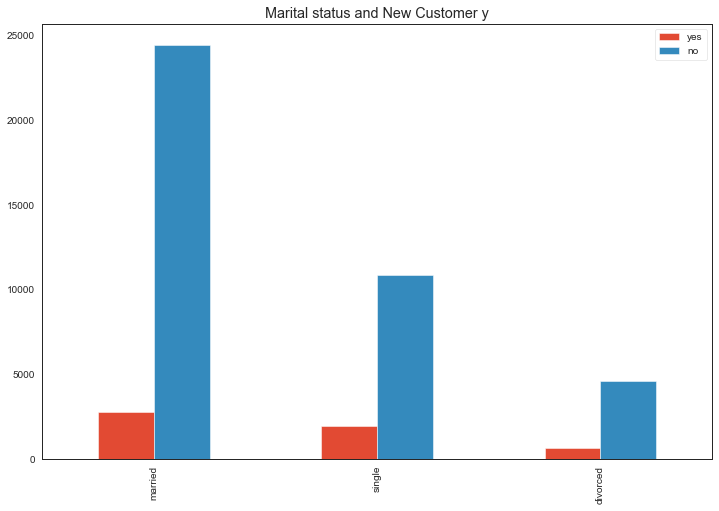

In [14]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['y'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and New Customer y')

<AxesSubplot:title={'center':'Education and New Customer y'}>

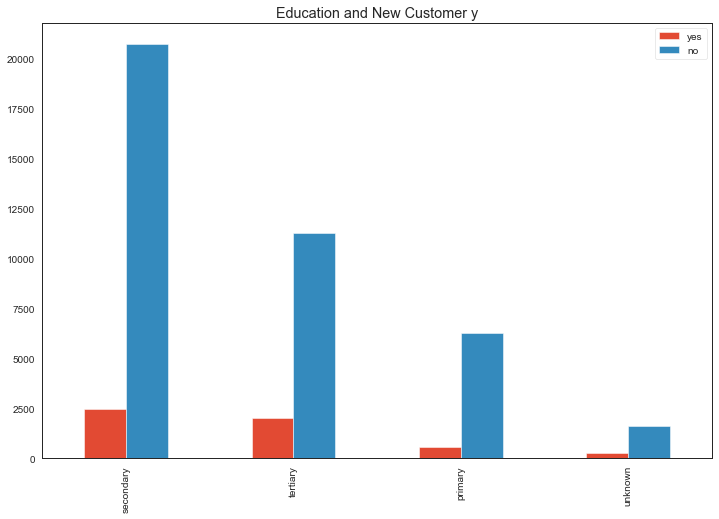

In [15]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['y'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and New Customer y')

<AxesSubplot:title={'center':'Type of contact and New Customer y'}>

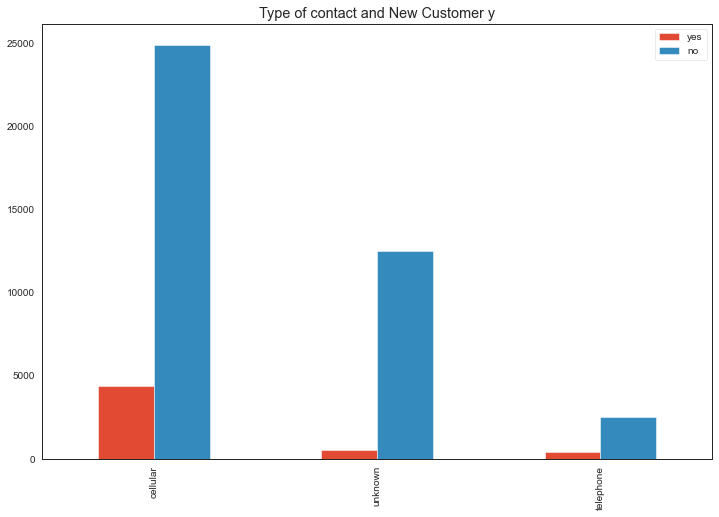

In [16]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['y'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and New Customer y')

<p style="font-size:20px"><span style="font-family:Times New Roman">Regarding the diagrams we can tell that according to our dataset:</span>.</p>

# <span style="font-family:Times New Roman"> Conclusion</span>
<p style="font-size:20px"><span style="font-family:Times New Roman">
* Customers with 'blue-collar' and 'services' jobs are less likely to Join the Bank as a new Customer.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">*  Married people more often agreed to become a new customer, but in relative terms the single people responded better.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Customers with 'cellular' type of contact are more likely to Join the Bank as a new Customer.</span></p>

***

<p style="font-size:20px"><span style="font-family:Times New Roman"> Now let's take a look on how numerical columns will affect New Customers Joining the bank.</span></p>

In [17]:
b_df = pd.DataFrame()
b_df['Balance_yes'] = (df[df['y'] == 'yes'][['y','balance']].describe())['balance']
b_df['Balance_no'] = (df[df['y'] == 'no'][['y','balance']].describe())['balance']

b_df

,Balance_yes,Balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


<AxesSubplot:title={'center':'Balance and New Customers statistics'}>

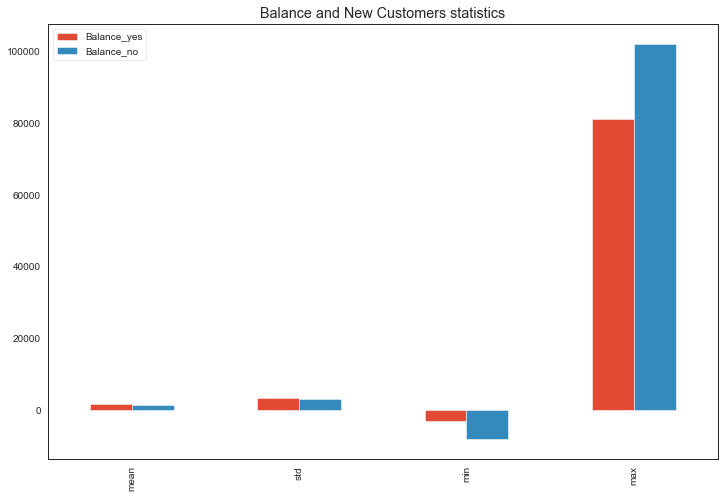

In [18]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and New Customers statistics')

In [19]:

a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (df[df['y'] == 'no'][['y','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


<AxesSubplot:title={'center':'Age and New Customer statistics'}>

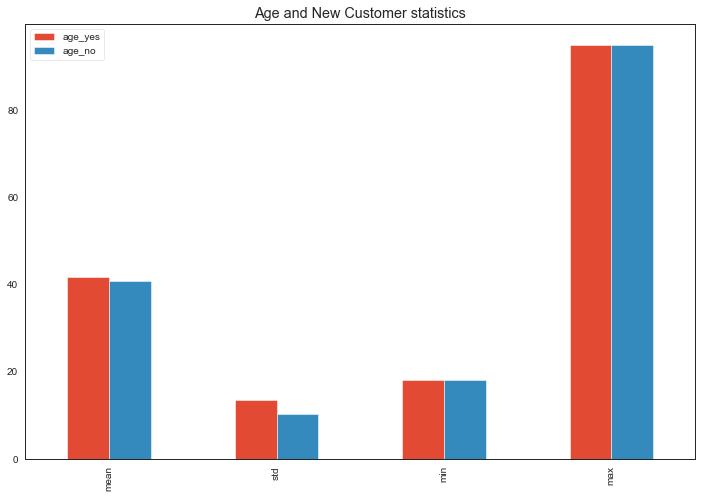

In [20]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and New Customer statistics')

##  <span style="font-family:Times New Roman">Numbers of contacts performed during this <span style="color:blue"> (campaign </span> and <span style="color:blue"> New Customers)</span></span>

In [21]:
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['y'] == 'yes'][['y','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['y'] == 'no'][['y','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<AxesSubplot:title={'center':'Number of contacts performed during this campaign and New Customers statistics'}>

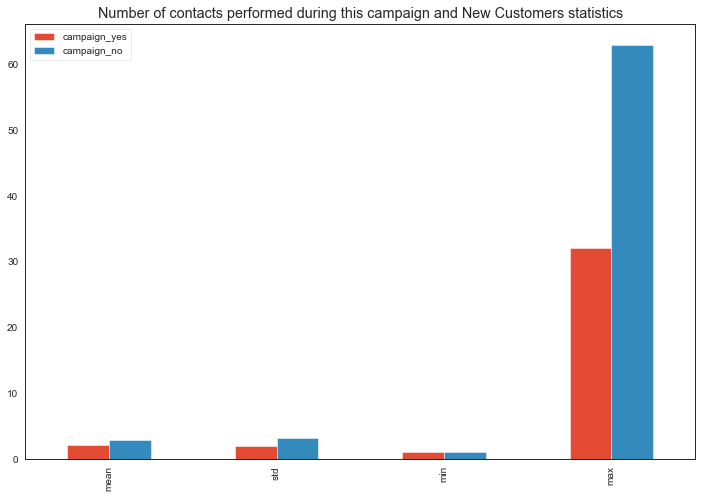

In [22]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and New Customers statistics')

# <span style="font-family:Times New Roman">Number of contacts performed during previous campaign <span style="color:blue"> (previous</span> and <span style="color:blue">new customers) </span></span>

In [23]:
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['y'] == 'yes'][['y','previous']].describe())['previous']
p_df['previous_no'] = (df[df['y'] == 'no'][['y','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,39922.000000
mean,1.170354,0.502154
std,2.553272,2.256771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,58.000000,275.000000


<AxesSubplot:title={'center':'Number of contacts performed during previous campaign and New Customers statistics'}>

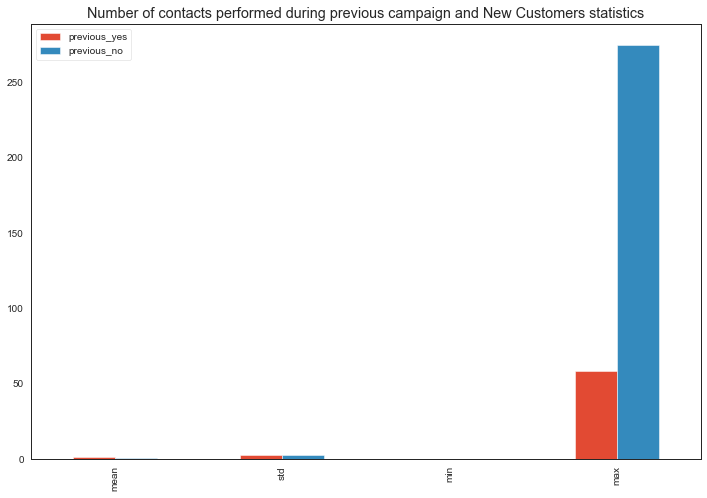

In [24]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and New Customers statistics')

# <span style="font-family:Times New Roman"> Conclusion</span>
<p style="font-size:20px"><span style="font-family:Times New Roman"> Looking at the diagrams above we can conclude that:</span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman">* People who Joined as a New Customer tend to have greater balance and age values.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* People who Joined as a New Customer tend to have fewer number of contacts during this campaign.</span></p>

***

# <span style="font-family:Times New Roman"> Data Cleaning</span>

<p style="font-size:20px"><span style="font-family:Times New Roman"> Before applying machine learning techniques, we should prepare the dataset for processing:</span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman">* Convert columns with 'yes' and 'no' values to boolean columns;</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Convert categorical columns into dummy variables.</span></p>

In [25]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_df = df.copy()
    
    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['default', 'housing', 'loan', 'y']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    #convert categorical columns to dummies
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
    
    #impute incorrect values and drop original columns
    cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df


# <span style="font-family:Times New Roman">Cleaning DataSet</span>

In [26]:
cleaned_df = clean_data(df)
cleaned_df.head()

,age,balance,day,duration,default_bool,housing_bool,loan_bool,y_bool,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,58,2143,5,261,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0,0.0
1,44,29,5,151,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0,0.0
2,33,2,5,76,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0,0.0
3,47,1506,5,92,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0,0.0
4,33,1,5,198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0,0.0


***

#  <span style="font-family:Times New Roman">Machine Learning for prediction of campaign outcome</span>

<p style="font-size:25px"><span style="font-family:Times New Roman"> Classification model for the campaign outcome prediction </span></p>

<p style="font-size:18px"><span style="font-family:Times New Roman"> Now let's use our cleaned datasets for prediction of the campaign outcome with help of machine learning classification models. I will use <span style="color:brown"><b>XGBoost,</b></span> which is one of the most common machine learning libraries for modelling.
Resulting model will also help me to understand, which features have the greatest importance for the prediction of the results of the Campaign.</span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman">Creating X and y datasets for training the model and spliting it into train and test datasets.</span></p>

In [27]:
import xgboost

In [28]:
X = cleaned_df.drop(columns = 'y_bool')
y = cleaned_df[['y_bool']]

In [29]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

***

<p style="font-size:20px"><span style="font-family:Times New Roman"> Train XGBoost classifier model:</span></p>

In [31]:
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))


[10:00:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB accuracy score for train: 0.937: test: 0.906


***

<p style="font-size:20px"><span style="font-family:Times New Roman"> Getting Features importances from the train model</span></p>

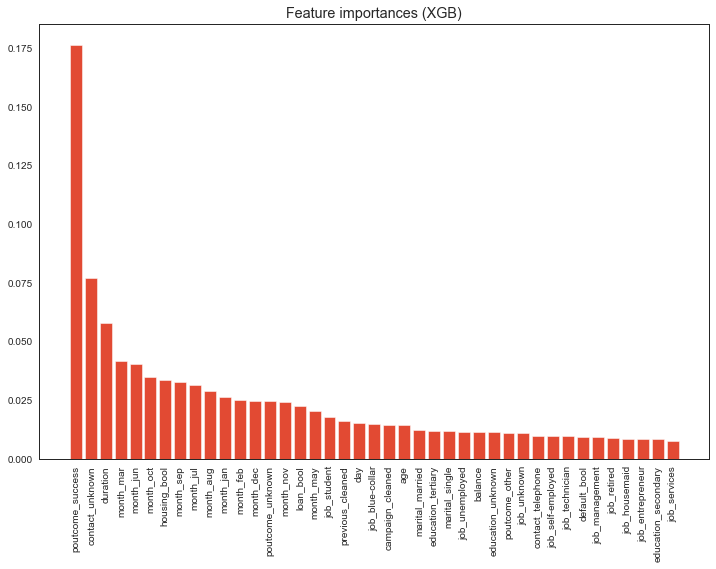

In [32]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

## <span style="font-family:Times New Roman"> As we can see from the diagram showing feature importances, the most important features are:<span>

<p style="font-size:20px"><span style="font-family:Times New Roman">*  Customer's account balance <span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Customer's age <span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Number of contacts performed during this campaign and contact duration <span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Number of contacts performed before this campaign.<span></p>

## <span style="font-family:Times New Roman">So the main outcome of the modelling are:</span>

<p style="font-size:20px"><span style="font-family:Times New Roman">* Customers of greater age are more likely to become a new customer by joining the bank.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Customers with greater account balance are more likely to become a new customer.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Number of contacts with the customers really matters. Too many contacts with the customer could make him decline the offer.</span></p>

***

<p style="font-size:20px"><span style="font-family:Times New Roman"> Let's try to make some specific recommendations:<br>By finding out account balance, and which marketing campaign we should focus on:</span></p>

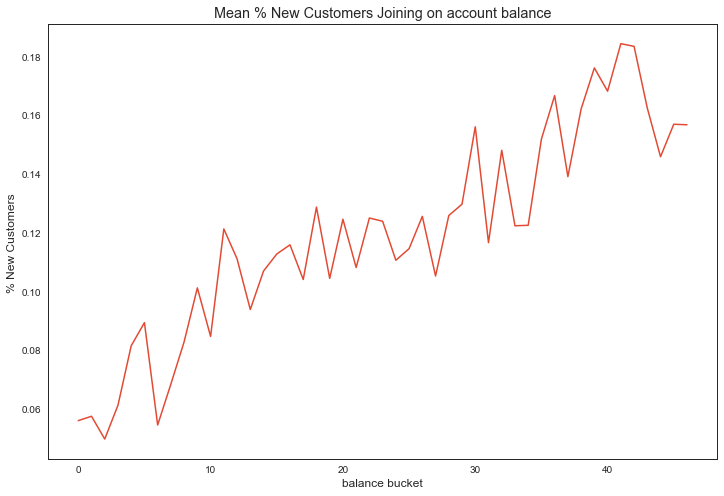

In [33]:
df_new = cleaned_df.copy()

#introduce new column 'balance_buckets' to  ''
df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_deposit = df_new.groupby(['balance_buckets'])['y_bool'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % New Customers Joining on account balance')
plt.xlabel('balance bucket')
plt.ylabel('% New Customers ')
plt.show()

In [34]:
df_new[df_new['balance_buckets'] == 34]['balance'].min()

1362

## <span style="font-family:Times New Roman"> Conclusion</span>
<p style="font-size:20px"><span style="font-family:Times New Roman"> From the above diagram we can conclude, that marketing campaigns should concentrate on New customers with account balance greater than $1362. </span></p>

***

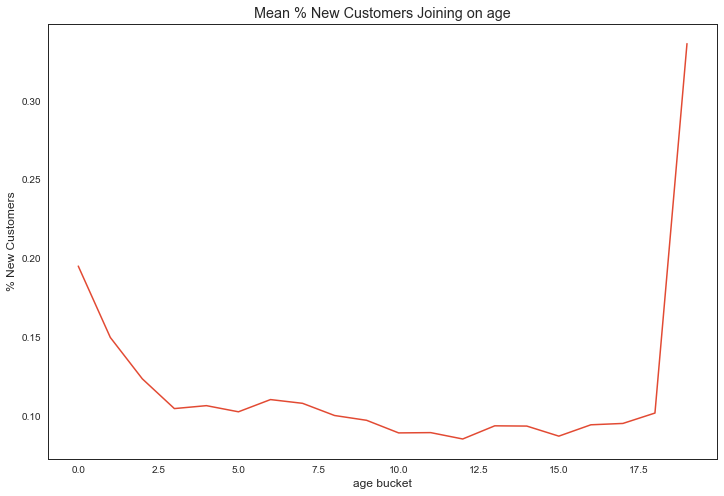

In [35]:
#introduce new column 'age_buckets' to  ''
df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_age = df_new.groupby(['age_buckets'])['y_bool'].mean()

#plot
plt.plot(mean_age.index, mean_age.values)
plt.title('Mean % New Customers Joining on age')
plt.xlabel('age bucket')
plt.ylabel('% New Customers')
plt.show()

In [36]:
df_new[df_new['age_buckets'] == 3]['age'].max()

32

In [37]:
df_new[df_new['age_buckets'] == 17]['age'].min()

54

## <span style="font-family:Times New Roman"> Conclusion<span>
<p style="font-size:20px"><span style="font-family:Times New Roman"> So we can see that the average New Customer rate tends to be higher for customers below 32 years old or above 54 years old.</span></p>

***

<p style="font-size:20px"><span style="font-family:Times New Roman"> Finding out appropriate number of contacts with New customers during the campaign:</span></p>

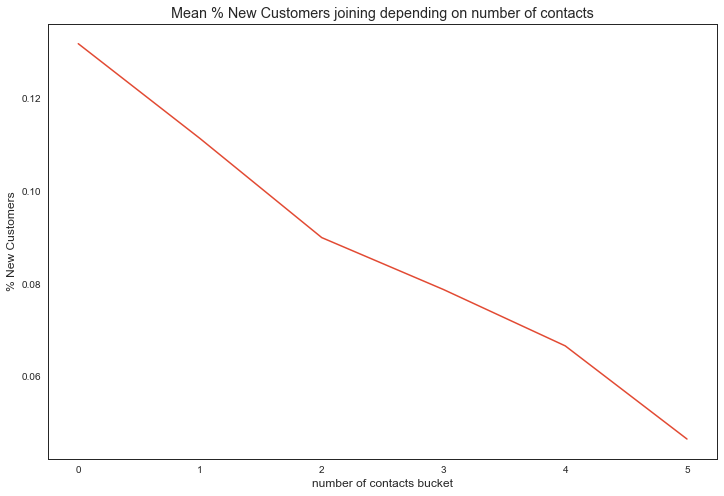

In [38]:
#introduce new column 'age_buckets' to  ''
df_new['campaign_buckets'] = pd.qcut(df_new['campaign_cleaned'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_campaign = df_new.groupby(['campaign_buckets'])['y_bool'].mean()

#plot average campaign outcome per bucket 
plt.plot(mean_campaign.index, mean_campaign.values)
plt.title('Mean % New Customers joining depending on number of contacts')
plt.xlabel('number of contacts bucket')
plt.ylabel('% New Customers')
plt.show()

In [39]:
df_new[df_new['campaign_buckets'] == 2]['campaign_cleaned'].min()

4.0

## <span style="font-family:Times New Roman"> Conclusion </span>
<p style="font-size:20px"><span style="font-family:Times New Roman"> From the plot above we can see that average New customer rate is below 50% if the number of contacts during the campaign exceeds 4.</span></p>

***

# <span style="font-family:Times New Roman"> Conclusion</span>

## <span style="font-family:Times New Roman"><span style="color:blue"><b>The key outcome of this analysis for future recommendations marketing campaign:</span></span><b>



<p style="font-size:20px"><span style="font-family:Times New Roman"> 1.The customer's account balance has a huge influence on the campaign's outcome. People with account balance above $1362 are more likely to Join as a New Customer, so in the future we need to address these customers.</span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman"> 2.The customer's age also affects the campaign outcome as well. Future campaigns should concentrate on customers with age categories below 32 years old and above 54 years old.</span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman"> 3.Number of contacts with the customer during the campaign is also very important. The number of contacts with the customer   shouldn't exceed 4.</span></p>